# Load Data

In [9]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory('data/train')
data_test = tf.keras.utils.image_dataset_from_directory('data/test')

Found 34714 files belonging to 21 classes.
Found 11548 files belonging to 21 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

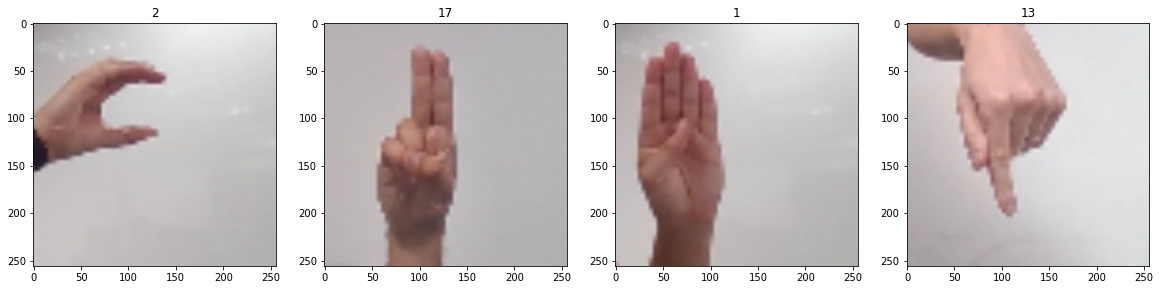

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Split Data

In [14]:
train_size = int(len(data)*.8)
val_size = int(len(data)*.2)

In [15]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)

# Building Model

In [16]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [18]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(21, activation='softmax'))

In [19]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# Train

In [21]:
logdir='logs'

In [22]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [23]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
868/868 [==============================] - 298s 342ms/step - loss: 2.4211 - accuracy: 0.8883 - val_loss: 0.1275 - val_accuracy: 0.9687
Epoch 2/20
868/868 [==============================] - 320s 368ms/step - loss: 0.0742 - accuracy: 0.9804 - val_loss: 0.1063 - val_accuracy: 0.9754
Epoch 3/20
868/868 [==============================] - 372s 428ms/step - loss: 0.3739 - accuracy: 0.9130 - val_loss: 0.3357 - val_accuracy: 0.9498
Epoch 4/20
868/868 [==============================] - 387s 446ms/step - loss: 0.4412 - accuracy: 0.8923 - val_loss: 0.1589 - val_accuracy: 0.9602
Epoch 5/20
868/868 [==============================] - 358s 413ms/step - loss: 0.0618 - accuracy: 0.9832 - val_loss: 0.0978 - val_accuracy: 0.9792
Epoch 6/20
868/868 [==============================] - 313s 361ms/step - loss: 0.0486 - accuracy: 0.9874 - val_loss: 0.1146 - val_accuracy: 0.9782
Epoch 7/20
868/868 [==============================] - 320s 368ms/step - loss: 0.0307 - accuracy: 0.9924 - val_loss: 0.1141 -

# Performance

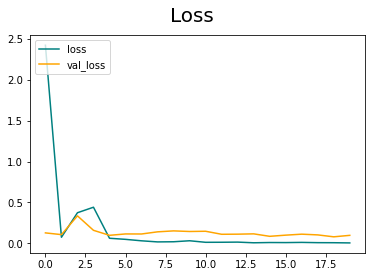

In [24]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

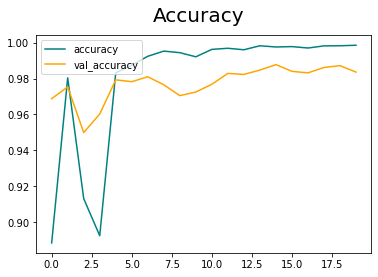

In [25]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

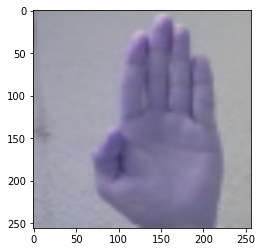

In [35]:
img = cv2.imread('data/test/B/1.png')

resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [36]:
# from tensorflow.keras.models import load_model
# model.save(os.path.join('./model','imageclassifier.h5'))
new_model = load_model('./model/imageclassifier.h5')
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 44ms/step


array([[2.5461440e-04, 3.7767466e-03, 6.0791138e-04, 3.7328973e-03,
        4.3415997e-04, 2.6849213e-01, 5.8337092e-02, 1.4558961e-03,
        6.0847294e-02, 2.9272854e-01, 1.6483987e-02, 3.9620747e-05,
        1.0760239e-02, 3.4956314e-02, 4.2469211e-02, 2.3989247e-02,
        1.4822192e-02, 1.1190258e-04, 1.5338558e-03, 1.5317659e-02,
        1.4884856e-01]], dtype=float32)